# Is Bitcoin a Good Investment? A Comparative Analysis Against Traditional Investments 

## Introduction 

Bitcoin, the most widely recognised cryptocurrency, has consistently drawn global attention for its market dominance and longevity. First introduced in 2009, it has the longest trading history among digital assets (Nakamoto, 2008). According to CoinMarketCap (2025), it remains the largest cryptocurrency by market capitalisation and consistently leads in daily and monthly trading volume. Its prominence is further reinforced by sustained institutional interest and public attention (Fidelity Digital Assets, 2023). Given its historical significance, data availability, and benchmark role in the digital asset market, this project examines whether Bitcoin is a worthwhile addition to an investment portfolio. 

To enable a meaningful comparison, four additional datasets were selected: Brent Crude Oil Futures ("Oil"), Gold Futures ("Gold"), NASDAQ Composite Index ("NASDAQ"), and US Dollar Index Futures ("USD"). These assets represent major segments of global finance: commodities, equities, and currencies. Together, they offer a balanced view of traditional markets across asset classes. By combining these datasets with Bitcoin data, this project seeks to explore return, risk, and correlation dynamics - insights that would be inaccessible without integrating data across multiple financial domains. 

## Part 1: Wrangling Details

### 1. Data sourcing

All datasets were sourced from publicly available financial archives.

The [Bitcoin](https://www.kaggle.com/datasets/sudalairajkumar/cryptocurrencypricehistory) dataset was obtained from Kaggle and includes daily prices from 29 April 2013 to 6 July 2021. The dataset is in CSV format containing nearly 3,000 records and 10 fields:

- SNo – serial number of the row

- Name – name of the asset (Bitcoin)

- Symbol – trading symbol (BTC)

- Date – trading date and timestamp

- High – highest price of the day in USD

- Low – lowest price of the day in USD

- Open – opening price in USD

- Close – closing price in USD

- Volume – daily traded volume

- Marketcap – estimated total market value of Bitcoin that day

The complementary datasets — [Oil](https://www.investing.com/commodities/brent-oil-historical-data), [Gold](https://www.investing.com/commodities/gold-historical-data), [NASDAQ](https://www.investing.com/indices/nasdaq-composite-historical-data), and the [USD](https://www.investing.com/commodities/gold-historical-data) datasets were sourced from Investing.com and cover the date range as the Bitcoin dataset. Each file was downloaded in CSV format and contained approximately 3,000 rows of daily records. 

All four datasets share a consistent structure with the following 7 fields:

- Date – trading date and timestamp

- Price – closing price in USD

- Open – opening price in USD

- High – highest price of the day in USD

- Low – lowest price of the day in USD

- Vol. – daily trading volume 

- Change % – the daily percentage change from the previous close

The analysis period is from 1 July 2017 to 30 June 2021, as this period marks a more mature and data-rich phase of the cryptocurrency market — driven by Bitcoin’s growing institutional relevance following the launch of CME Bitcoin futures — and allows for consistent 12-month interval analysis using the most recent four years of complete data available. This period was chosen to ensure data consistency across sources and to capture a representative mix of market conditions, including relative stability and heightened volatility during the COVID-19 pandemic.   


### 2. Data auditing
Initial data auditing identified several potential problems including missing data on non-trading days for traditional markets and inconsistent date formatting. 

In [91]:
# Import packages

import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

In [92]:
# Read oil dateset into Python

oil = pd.read_csv("Brent Oil Futures Historical Data.csv")
oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3197 entries, 0 to 3196
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      3197 non-null   object 
 1   Price     3197 non-null   float64
 2   Open      3197 non-null   float64
 3   High      3197 non-null   float64
 4   Low       3197 non-null   float64
 5   Vol.      3195 non-null   object 
 6   Change %  3197 non-null   object 
dtypes: float64(4), object(3)
memory usage: 175.0+ KB


In [93]:
# Read gold dateset into Python

gold = pd.read_csv("Gold Futures Historical Data.csv")
gold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      3140 non-null   object
 1   Price     3140 non-null   object
 2   Open      3140 non-null   object
 3   High      3140 non-null   object
 4   Low       3140 non-null   object
 5   Vol.      3137 non-null   object
 6   Change %  3140 non-null   object
dtypes: object(7)
memory usage: 171.8+ KB


In [94]:
# Read USD dateset into Python

usd = pd.read_csv("US Dollar Index Futures Historical Data.csv")
usd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3174 entries, 0 to 3173
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      3174 non-null   object 
 1   Price     3174 non-null   float64
 2   Open      3174 non-null   float64
 3   High      3174 non-null   float64
 4   Low       3174 non-null   float64
 5   Vol.      3163 non-null   object 
 6   Change %  3174 non-null   object 
dtypes: float64(4), object(3)
memory usage: 173.7+ KB


In [95]:
# Read NASDAQ dateset into Python

nasdaq = pd.read_csv("NASDAQ Composite Historical Data.csv")
nasdaq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3090 entries, 0 to 3089
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      3090 non-null   object
 1   Price     3090 non-null   object
 2   Open      3090 non-null   object
 3   High      3090 non-null   object
 4   Low       3090 non-null   object
 5   Vol.      3090 non-null   object
 6   Change %  3090 non-null   object
dtypes: object(7)
memory usage: 169.1+ KB


In [96]:
# Read Bitcoin dateset into Python

bitcoin = pd.read_csv("coin_Bitcoin.csv")
bitcoin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2991 entries, 0 to 2990
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        2991 non-null   int64  
 1   Name       2991 non-null   object 
 2   Symbol     2991 non-null   object 
 3   Date       2991 non-null   object 
 4   High       2991 non-null   float64
 5   Low        2991 non-null   float64
 6   Open       2991 non-null   float64
 7   Close      2991 non-null   float64
 8   Volume     2991 non-null   float64
 9   Marketcap  2991 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 233.8+ KB


### 3. Data wrangling
Each dataset underwent individual cleaning steps in Python. 

As Oil, Gold, USD and NASDAQ share common structure, the following steps were performed: 

- Standardised the date format (Adjusted Date)

- Removed any rows with missing dates

- Converted Change % (string with % sign) to numeric percentage

- Renamed the column to reflect the dataset name (e.g., USD, NASDAQ)

In [97]:
# Datasets wrangling for Oil, Gold, USD and NASDAQ as they share common structure. 

def clean_percent_change(df, name):
    df = df.copy()
    df["Adjusted Date"] = pd.to_datetime(df["Date"], format="%m/%d/%Y", errors="coerce")
    df = df.dropna(subset=["Adjusted Date"])
    df[f"{name}"] = df["Change %"].str.replace('%', '', regex=False).astype(float)
    return df[["Adjusted Date", f"{name}"]]

oil_clean = clean_percent_change(oil, "Oil")
gold_clean = clean_percent_change(gold, "Gold")
usd_clean = clean_percent_change(usd, "USD")
nasdaq_clean = clean_percent_change(nasdaq, "NASDAQ")


In [98]:
# Inspect the cleaned dataset of Oil
oil_clean

,Adjusted Date,Oil
0,2025-05-19,-0.38
1,2025-05-18,0.15
2,2025-05-16,1.36
3,2025-05-15,-2.36
4,2025-05-14,-0.81
...,...,...
3192,2013-01-08,0.48
3193,2013-01-07,0.08
3194,2013-01-04,-0.74
3195,2013-01-03,-0.29


In [99]:
# Inspect the cleaned dataset of Gold
gold_clean

,Adjusted Date,Gold
0,2025-04-15,0.44
1,2025-04-14,-0.56
2,2025-04-11,2.11
3,2025-04-10,3.19
4,2025-04-09,2.98
...,...,...
3135,2013-01-08,0.97
3136,2013-01-07,-0.16
3137,2013-01-04,-1.53
3138,2013-01-03,-0.84


In [100]:
# Inspect the cleaned dataset of USD
usd_clean

,Adjusted Date,USD
0,2025-04-15,0.15
1,2025-04-14,-0.50
2,2025-04-11,-0.71
3,2025-04-10,-1.96
4,2025-04-09,-0.08
...,...,...
3169,2013-01-08,0.09
3170,2013-01-07,-0.30
3171,2013-01-04,0.12
3172,2013-01-03,0.71


In [101]:
# Inspect the cleaned dataset of NASDAQ
nasdaq_clean

,Adjusted Date,NASDAQ
0,2025-04-14,0.64
1,2025-04-11,2.06
2,2025-04-10,-4.31
3,2025-04-09,12.16
4,2025-04-08,-2.15
...,...,...
3085,2013-01-08,-0.23
3086,2013-01-07,-0.09
3087,2013-01-04,0.04
3088,2013-01-03,-0.38


Bitcoin required separate handling due to different structure and missing variable Change %.

- Standardised the date (Adjusted Date)

- Sorted records in chronological order

- Calculated daily percentage change from Close prices

- Removed rows with null returns

- Normalised datetime values (removed time portion)

In [102]:
# Datasets wrangling for Bitcoin

bitcoin = bitcoin.copy()
bitcoin["Adjusted Date"] = pd.to_datetime(bitcoin["Date"], errors="coerce")
bitcoin = bitcoin.sort_values("Adjusted Date")
bitcoin["Bitcoin"] = bitcoin["Close"].pct_change() * 100
bitcoin_clean = bitcoin.dropna(subset=["Bitcoin"])
bitcoin_clean = bitcoin_clean.copy()  
bitcoin_clean.loc[:, "Adjusted Date"] = bitcoin_clean["Adjusted Date"].dt.normalize()
bitcoin_clean = bitcoin_clean[["Adjusted Date", "Bitcoin"]]

In [103]:
# Inspect the cleaned dataset of Bitcoin
bitcoin_clean

,Adjusted Date,Bitcoin
1,2013-04-30,-3.832845
2,2013-05-01,-15.834534
3,2013-05-02,-10.069236
4,2013-05-03,-7.090580
5,2013-05-04,15.089514
...,...,...
2986,2021-07-02,0.967860
2987,2021-07-03,2.276009
2988,2021-07-04,1.786147
2989,2021-07-05,-4.369154


After cleaning and aligning the individual datasets, a step-by-step merge was performed to create a unified dataset for analysis.

- Merged the five cleaned datasets on the common Adjusted Date field.

- Ensured only dates present in all datasets were retained by using an inner join.

- Renamed columns to standardised, readable names.

- Sorted the final dataset in ascending order by date and reset the index.

In [104]:
# Merge the 5 datasets into one

df_merged = bitcoin_clean
for df in [nasdaq_clean, oil_clean, usd_clean, gold_clean]:
    df_merged = pd.merge(df_merged, df, on="Adjusted Date", how="inner")


df_final = df_merged[["Adjusted Date", "Bitcoin", "NASDAQ", "Oil", "USD", "Gold"]]
df_final = df_final.sort_values("Adjusted Date").reset_index(drop=True)

data = df_final.rename(columns={
    "Adjusted Date": "adjusted_date",   
    "Bitcoin": "bitcoin_change%",
    "NASDAQ": "nasdaq_change%",
    "Oil": "oil_change%",
    "USD": "usd_change%",
    "Gold": "gold_change%"
})

In [105]:
# Inspect the combined dataset
data

,adjusted_date,bitcoin_change%,nasdaq_change%,oil_change%,usd_change%,gold_change%
0,2013-04-30,-3.832845,0.66,-1.39,-0.48,0.32
1,2013-05-01,-15.834534,-0.89,-2.36,-0.35,-1.76
2,2013-05-02,-10.069236,1.26,2.90,0.93,1.48
3,2013-05-03,-7.090580,1.14,1.30,-0.11,-0.23
4,2013-05-06,-3.114486,0.42,1.22,0.22,0.26
...,...,...,...,...,...,...
2032,2021-06-29,4.162829,0.19,0.11,0.18,-0.91
2033,2021-06-30,-2.305525,-0.17,0.49,0.42,0.45
2034,2021-07-01,-4.191451,0.13,0.95,0.18,0.29
2035,2021-07-02,0.967860,0.81,0.44,-0.20,0.37


With the timeframe for the analysis being a fixed 4-year window: 1 July 2017 to 30 June 2021, the combined dataset was filtered to include only rows within this time range. 

In [106]:
# Filter the combined dataset from 1 July 2017 to 30 June 2021

start_date = "2017-07-01"
end_date = "2021-06-30"

data_filtered = data[
    (data["adjusted_date"] >= start_date) & (data["adjusted_date"] <= end_date)
][["adjusted_date", "bitcoin_change%","nasdaq_change%","oil_change%","usd_change%","gold_change%"]]

data_filtered

,adjusted_date,bitcoin_change%,nasdaq_change%,oil_change%,usd_change%,gold_change%
1028,2017-07-03,2.297657,-0.49,2.50,0.57,-1.86
1029,2017-07-05,0.013457,0.67,-3.67,0.09,0.14
1030,2017-07-06,0.252502,-1.00,0.67,-0.50,0.13
1031,2017-07-07,-3.446351,1.04,-2.91,0.23,-1.11
1032,2017-07-10,-5.792470,0.38,0.40,-0.02,0.29
...,...,...,...,...,...,...
2029,2021-06-24,2.785654,0.69,0.49,0.01,-0.38
2030,2021-06-25,-8.726034,-0.06,0.82,0.05,0.07
2031,2021-06-28,-0.621390,0.98,-1.97,0.03,0.16
2032,2021-06-29,4.162829,0.19,0.11,0.18,-0.91


The fully combined and filtered dataset was saved into a CSV file using UTF-8 encoding. CSV format was chosen because it is widely supported, easy to share, and compatible with analysis tools. Index was excluded from the saved file to keep it clean and ready for downstream use. 

The CSV files for individual datasets and combined dataset can be accessed from [Google Drive.](https://drive.google.com/drive/folders/1ZdAaa6iXim7XF7-XRJZIXgRh6JqgMUPd?usp=drive_link)

In [107]:
# Save the filtered dataset to CSV
data_filtered.to_csv("combined_dataset_final.csv", index=False, encoding="utf-8")

## Part 2: Questions & Answers

With the cleaned and consolidated dataset in place, the analysis explored three core questions comparing Bitcoin to traditional investments in terms of return, risk, and correlation. A fourth question was then introduced to examine a broader aspect of Bitcoin’s investment profile, highlighting a limitation of the combined dataset and requiring supplementary data for further investigation. 

### Question 1: How does Bitcoin’s return compare to other investments?

#### Answer
Between 1 July 2017 and 30 June 2021, Bitcoin delivered the most favourable return relative to the risk involved, outperforming all other selected assets. Based on the Sharpe Ratio - a metric that compares an asset’s return to the level of risk taken - Bitcoin achieved the highest score at 1.22, ahead of NASDAQ (0.96), Gold (0.54), Oil (0.45), and the US Dollar Index (-0.43). This result suggests that investors were better rewarded for the risk taken when investing in Bitcoin during this period, compared to traditional assets. 

#### Approach and Tools Used
To evaluate investment return performance, this analysis used the Sharpe Ratio, a widely used measure of risk-adjusted return, to compare Bitcoin with traditional investments. The Sharpe Ratio evaluates how much excess return an asset provides for each unit of risk taken. It is particularly useful for comparing assets with different levels of return variability, helping investors assess whether the higher return is justified by the additional risk. It is defined as: 

$$
\text{Sharpe Ratio} = \frac{R_a - R_f}{\sigma_a}
$$

where:
- $R_a$ is the asset’s average return  
- $R_f$ is the risk-free rate  
- $\sigma_a$ is the standard deviation of the asset’s returns (a proxy for risk)

The Sharpe Ratio used in this analysis is based on annualised return and risk, calculated from daily data. The average return was multiplied by 252, and the standard deviation was scaled by the square root of 252 to reflect annual risk. This approach follows the standard industry convention of assuming 252 trading days per year (CFA Institute, 2023). 

In line with industry practice, the 10-year U.S. Treasury yield was used as a proxy for the risk-free rate. This benchmark reflects the return on a low-risk investment over a long horizon and is commonly used in institutional financial analysis. The average yield over the study period (1 July 2017 – 30 June 2021) was approximately 1.95%, based on data from the Federal Reserve Economic Data (FRED), specifically the market yield on U.S. Treasury securities at 10-year constant maturity, quoted on an investment basis (FRED, 2025). 

The technical analysis was conducted in Python using the following libraries: 

- **pandas** for importing, cleaning, and aligning daily time series data 

- **numpy** for computing returns, averages, standard deviation, and applying the Sharpe Ratio formula 

- **matplotlib.pyplot** for creating a bar chart to visualise and compare Sharpe Ratios across assets 

#### Step-by-Step Analytical Process

Step 1: Extract and standardise return data 

The analysis began by selecting daily return percentage columns from the cleaned dataset: 

- "bitcoin_change%" 

- "nasdaq_change%" 

- "oil_change%" 

- "usd_change%" 

- "gold_change%" 

These values were then converted from percentage to decimal format by dividing each by 100. This standardisation ensured consistency in calculations and enabled valid performance comparisons across all asset classes. 

Columns were also renamed for better readability.  

In [108]:
# Convert % to decimal returns using original column names
returns = data_filtered[[
    "bitcoin_change%",
    "nasdaq_change%",
    "oil_change%",
    "usd_change%",
    "gold_change%"
]] / 100

# Rename columns for readability
returns.columns = ["Bitcoin", "NASDAQ", "Oil", "USD", "Gold"]

Step 2: Define parameters 

The Sharpe Ratio was selected as the primary metric for evaluating risk-adjusted returns across assets. 

- Trading days per year: Assumed to be 252, representing the standard number of trading days in a calendar year. 

- Risk-free rate: Set at 1.944%, based on the average U.S. 10-Year Treasury yield over the analysis period. 

These parameters were applied consistently in the annualisation and Sharpe Ratio calculations that follow. 

In [109]:
trading_days = 252  # Trading days per year
risk_free_rate = 0.0194  # Annual risk-free rate (1.944%)

Step 3: Calculate Sharpe Ratio 

Sharpe Ratio for each asset to assess performance relative to risk was calculated using the following logic: 

- Annualised return: Daily average returns were multiplied by the standard 252 trading days. 

- Annualised standard deviation (risk): Daily standard deviation was scaled by the square root of 252 trading days. 

- Excess return: The difference between each asset’s annual return and the 1.95% risk-free rate. 

- Sharpe Ratio: Computed by dividing the excess return by the annualised standard deviation. 

- Result: Final values were rounded to improve readability for presentation and comparison. 

In [110]:
# Step 3: Calculate Sharpe Ratio
mean_annual_return = returns.mean() * trading_days
annual_volatility = returns.std() * np.sqrt(trading_days)
excess_return = mean_annual_return - risk_free_rate
sharpe_ratio = excess_return / annual_volatility

Step 4: Visualise and compare results 

- Sharpe Ratios were sorted from highest to lowest.

- A bar chart was created to visually compare performance.

- Axis labels, gridlines, and formatting were added.

Sharpe Ratios (1 July 2017 – 30 June 2021):
Bitcoin    1.215
NASDAQ     0.957
Oil        0.449
USD       -0.431
Gold       0.538
dtype: float64


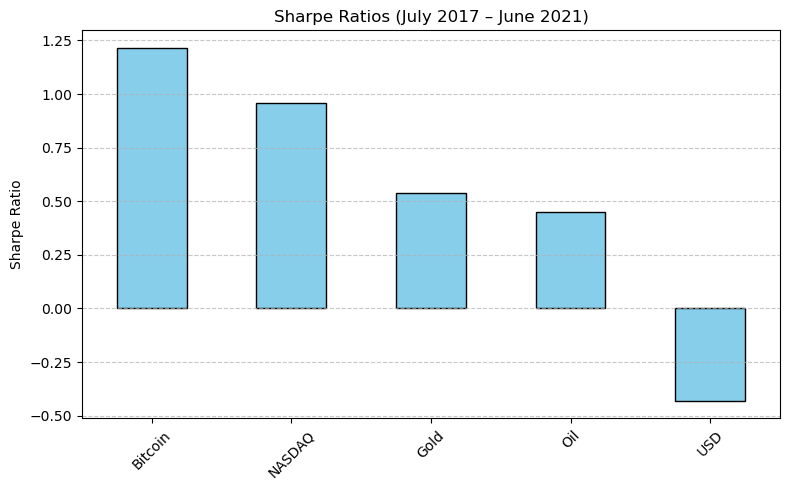

In [111]:
# Output result
sharpe_ratio = sharpe_ratio.round(3)

print("Sharpe Ratios (1 July 2017 – 30 June 2021):")
print(sharpe_ratio)

# Sort from high to low
sharpe_sorted = sharpe_ratio.sort_values(ascending=False)

# Create bar chart
plt.figure(figsize=(8, 5))
sharpe_sorted.plot(kind="bar", color="skyblue", edgecolor="black")

# Add chart details
plt.title("Sharpe Ratios (July 2017 – June 2021)")
plt.ylabel("Sharpe Ratio")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()

# Show chart
plt.show()

#### Implication
This return analysis confirms that Bitcoin significantly outperformed traditional investment types in terms of overall return efficiency. Its high Sharpe Ratio suggests that, over the observed period, investors were better rewarded for holding Bitcoin compared to NASDAQ, Oil, Gold, or USD. A Sharpe Ratio above 1 is generally considered strong, indicating that the asset provides excess returns that more than compensate for the risk taken (CFA Institute, 2020). In a real-world context, this highlights Bitcoin’s potential role as a high-growth asset capable of enhancing portfolio returns, especially for investors willing to accept higher risk in pursuit of superior risk-adjusted outcomes.

### Question 2: How risky is Bitcoin based on daily price fluctuations?  

#### Answer
Between 1 July 2017 and 30 June 2021, Bitcoin exhibited the highest level of risk among the selected assets, as measured by volatility. Its annualised volatility reached 74.05%, far exceeding Oil (43.07%), NASDAQ (23.40%), Gold (14.73%), and USD (6.04%). This confirms Bitcoin’s status as a high-risk investment with substantially larger price fluctuations than traditional investment classes. 

#### Approach and Tools Used 
This analysis measured risk using volatility, a common risk metric in finance that captures the degree of fluctuation in an asset’s returns over time. Higher volatility indicates greater uncertainty and larger potential swings in price, both upward and downward. It is defined as: 

$$
\text{Volatility} = \sqrt{\text{Var}(R)}
$$

where $ \text{Var}(R) $ is the variance of asset returns.

In practice, volatility is often estimated by calculating the standard deviation of daily returns, which serves as a proxy for risk (BigQuant, 2024). Annualised volatility was then calculated as the standard deviation of daily returns, scaled by the square root of 252, based on the standard assumption of 252 trading days in a year (CFA Institute, 2023).

The analysis was conducted in Python, using the following tools: 

- **pandas** for handling time series data 

- **numpy** for statistical calculations, including standard deviation and annualisation 

- **matplotlib.pyplot** for plotting a bar chart to visualise volatility across assets 

#### Step-by-Step Analytical Process
Step 1: Extract and standardise return data 

Daily return percentages for Bitcoin, NASDAQ, Oil, Gold, and USD were extracted from the cleaned dataset and converted to decimal format for consistency. 

Columns were also renamed for better readability. 

In [112]:
# Convert daily % returns to decimals
daily_returns = data_filtered.drop(columns=["adjusted_date"]) / 100

# Rename columns for readability
daily_returns.columns = ["Bitcoin", "NASDAQ", "Oil", "USD", "Gold"]

Step 2: Calculate annualised volatility 

- Volatility was calculated as the standard deviation of daily returns 

- This value was annualised by multiplying by the square root of 252 

- Results were scaled back to percentages for interpretability 

In [113]:
# Calculate annualised volatility
daily_volatility = daily_returns.std()
annualized_volatility = daily_volatility * np.sqrt(252)

# Convert to percentage format for display
annualized_volatility_pct = annualized_volatility * 100

Step 3: Visualise the results 

- Annualised volatility values were sorted in descending order 

- A bar chart was created to compare volatility across the five assets 

- Axis labels, gridlines, and percentage formatting were added for readability 

- A summary table was generated showing annualised volatility values 

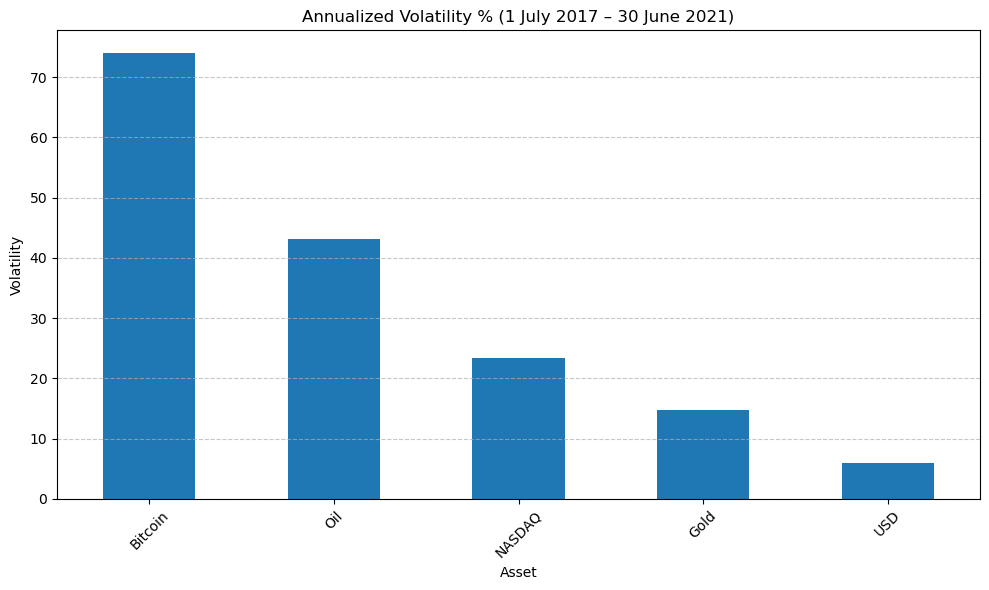

         Annualized Volatility
Bitcoin              74.048343
NASDAQ               23.402800
Oil                  43.067993
USD                   6.039676
Gold                 14.725447


In [114]:
# Plot annualised volatility
plt.figure(figsize=(10, 6))
annualized_volatility_pct.sort_values(ascending=False).plot(kind='bar')
plt.title("Annualized Volatility % (1 July 2017 – 30 June 2021)")
plt.ylabel("Volatility")
plt.xlabel("Asset")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Create summary table
volatility_summary = pd.DataFrame({
    "Annualized Volatility": annualized_volatility_pct
})
print(volatility_summary)

#### Implication
Bitcoin’s annualised volatility of 74.05% places it well above the 30% threshold often used to classify high-risk investments, such as speculative equities and cryptocurrencies (CFA Institute, 2023). At 30% volatility, an asset with an 8% expected return might fluctuate between –22% and +38% in a year (Morningstar, 2023). Bitcoin’s volatility more than doubles that, highlighting its potential for large gains but also steep losses. This level of risk makes it more suitable for investors with high risk tolerance or for portfolios targeting aggressive growth. 


### Question 3: How correlated is Bitcoin with traditional investments?

#### Answer 

Between July 2017 and June 2021, Bitcoin’s daily return showed low correltaion with traditional assets, 0.12 with Nasdaq, and near zero with Oil, Gold, and USD. This suggests Bitcoin behaved largely independently of traditional markets. And such weak correlations imply diversification benefits. Despite its volatility, Bitcoin could serve as a complementary asset in a well-balance portfolio.  

#### Approach and Tools Used 

Diversification is a fundamental principle in investment strategy, aimed at reducing risk by allocating capital across assets that do not move in the same direction. When assets in a portfolio are weakly correlated, a loss in one can be balanced out by gains in another, leading to more stable overall returns. In this context, finding assets that behave differently from traditional markets, such as NASDAQ, Gold, Oil, and USD, can play a key role in managing risk and protecting long-term performance.

To evaluate whether Bitcoin moves differently from traditional assets, and therefore could support diversification, a Pearson correlation matrix was computed to measure the linear realtionship between their daily returns. The Pearson correlation coefficient between two return series X and Y is defined as:  

$$
\rho_{X,Y} = \frac{\mathrm{Cov}(X, Y)}{\sigma_X \sigma_Y}
$$

Where Cov(X, Y) is covariance between the Daily percentage returns of X and Y, and $\sigma_X$ and $\sigma_Y$ are their standard deviations. These daily percentage returns have been calculated previously and reused here as input for correlation analysis. This coefficient ranges from –1 to +1, indicating how strong and in what directions two variables move together.  A value close to +1 indicates a strong positive relationship, while a value near –1 suggests a strong negative relationship. A value close to 0 implies little or no linear correlation (Turney, 2023). The table below summarises the general interpretation of Pearson correlation values.  

| Pearson correlation coefficient (r) value | Strength | Direction |
|-------------------------------------------|----------|-----------|
| Greater than 0.5                          | Strong   | Positive  |
| Between 0.3 and 0.5                       | Moderate | Positive  |
| Between 0 and 0.3                         | Weak     | Positive  |
| 0                                         | None     | None      |
| Between 0 and –0.3                        | Weak     | Negative  |
| Between –0.3 and –0.5                     | Moderate | Negative  |
| Less than –0.5                            | Strong   | Negative  |

This analysis was conducted in Python using:

- **pandas** – for computing the Pearson correlation matrix

#### Step-by-Step Analytical Process

Step 1: Prepare and align data

Daily percentage returns from Question 1 were used as input for this analysis. These return series were first aligned by date to ensure consistency across all assets.

Step 2: Rename columns for clarity

For ease of interpretation, the column names were renamed to reflect asset classes more clearly (e.g., "bitcoin_change%" to "Bitcoin").

Step 3: Compute Pearson correlation matrix

The correlation function was used to generate a correlation matrix.



In [115]:
# Rename columns for clarity (optional)
filtered = df_merged.rename(columns={
    'bitcoin_change%': 'Bitcoin',
    'nasdaq_change%': 'NASDAQ',
    'oil_change%': 'Oil',
    'usd_change%': 'USD',
    'gold_change%': 'Gold'
})

# Create correlation matrix of daily returns
correlation_matrix = filtered[['Bitcoin', 'NASDAQ', 'Oil', 'USD', 'Gold']].corr()
correlation_matrix

,Bitcoin,NASDAQ,Oil,USD,Gold
Bitcoin,1.000000,0.124406,0.041371,-0.002203,0.035968
NASDAQ,0.124406,1.000000,0.278744,0.030650,0.010397
Oil,0.041371,0.278744,1.000000,-0.031820,0.053027
USD,-0.002203,0.030650,-0.031820,1.000000,-0.376666
Gold,0.035968,0.010397,0.053027,-0.376666,1.000000


#### Implication

The correlation matrix shows that Bitcoin’s daily returns were weakly correlated with traditional financial assets over the period from July 2017 to July 2021. Key findings are as follows:

- **Bitcoin–Nasdaq:** 0.124  
- **Bitcoin–Oil:** 0.041  
- **Bitcoin–Gold:** 0.036
- **Bitcoin–USD:** -0.002  

Given the consistently low correlation values, Bitcoin return behaviour appears largely independent of traditional assets during the analysis period. The low or near-zero correlations with NASQDAQ, Oil, Gold, and USD indicate that Bitcoin does not behave like traditional commodity or safe-haven assets.

This independence implies potential diversification value. Under Modern Portfolio Theory (Markowitz, 1952), diversification benefits arise when assets in a portfolio are not perfectly correlated. Combining assets with low or negative correlations can reduce overall portfolio volatility without necessarily compromising expected returns. Bitcoin’s weak correlations suggest that it could serve as a valuable component in a diversified portfolio.

## Part 3: Limitation & Proposed Web Scraping Solution

### Question 4: How does fear affect Bitcoin investors?

### Limitation

Behavioral finance research shows that investor decisions are often influenced by emotions like fear and overconfidence. Barberis et al. (1998) argue that cognitive biases such as representativeness and conservatism can cause investors to underreact to new information at first and overreact later, leading to asset prices deviating from their fundamental values.

The current combined dataset supports return, risk, and correlation analysis for Bitcoin, NASDAQ, Oil, USD, and Gold. However, it lacks any measurement of investors' sentiment. Without such sentiment indicator, why asset returns or trading volumes vary across time cannot be explained, especially during periods of calm versus panic, such as economic crashes, global conflicts, or public health emergencies like COVID-19. This limits our ability to assess how fear or confidence influences trading activity across different assets.

This highlights the need for sentiment analysis, beyond just price and volume, when evaluating investment behavior across asset classes. Incorporating sentiment indicator like the CBOE Volatility Index (VIX) could therefore fill a critical gap in our current dataset and provide deeper insight into how investors respond under different market conditions.

### Proposed Web Scraping Solution

To address this limitation, web scraping was used to collect daily VIX index values from [Yahoo Finance](https://finance.yahoo.com/quote/%5EVIX/history/?period1=1498867200&period2=1625011200). The VIX is widely recognised as a “fear gauge” that reflects investor sentiment in equity market. By segmenting the VIX values into categories (e.g., VIX < 10: extreme calm; VIX > 40: extreme panic), Bitcoin’s returns under different investor sentiment conditions can be evaluated.

#### Step-by-Step Process

Step 1: Web Scraping VIX Data

The **Selenium**, **BeautifulSoup**, **pandas**, **time**, and **datetime** packages in Python were used to scrape the VIX index from Yahoo Finance. A headless Chrome browser was configured using **webdriver.Chrome** to load the historical VIX data page for the specified period (1 July 2017 to 30 June 2021), ensuring consistency with the Bitcoin return dataset.

The HTML table was parsed using **BeautifulSoup**, and the relevant data was extracted using **pandas**. The following data cleaning steps were then applied:

- Removed rows containing dividend-related records

- Selected and renamed two key columns:

    - adjusted_date: the trading date, converted to YYYY-MM-DD format

    - close: the daily closing value of the VIX index

The resulting DataFrame was then ready to be merged with the combined dataset for further analysis.


In [116]:
# Import the package
import requests as rq
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from bs4 import BeautifulSoup
import time

In [117]:
# URL with the defined time range
url = "https://finance.yahoo.com/quote/%5EVIX/history/?period1=1498867200&period2=1625011200"

# Set up headless browser
options = Options()
options.add_argument("--headless")
options.add_argument("--disable-gpu")
options.add_argument("--window-size=1920,1080")
driver = webdriver.Chrome(service=Service(), options=options)

# Open the page and wait
driver.get(url)
time.sleep(10)

# Parse and get the table
soup = BeautifulSoup(driver.page_source, "html.parser")
table = soup.find("table")
df = pd.read_html(str(table))[0]

# Remove 'Dividend' rows
df = df[~df['Date'].str.contains("Dividend", na=False)]

# Select only 'Date' and the 5th column (index 4), then rename it
df_vix = df.iloc[:, [0, 4]]
df_vix.columns = ['date', 'close']

# Convert date to YYYY-MM-DD
df_vix['date'] = pd.to_datetime(df_vix['date'], format="%b %d, %Y")
df_vix['date'] = df_vix['date'].dt.strftime("%Y-%m-%d")

# Quit
driver.quit()


C:\Users\ych236\AppData\Local\Temp\ipykernel_15972\12436084.py:18: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]
C:\Users\ych236\AppData\Local\Temp\ipykernel_15972\12436084.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vix['date'] = pd.to_datetime(df_vix['date'], format="%b %d, %Y")
C:\Users\ych236\AppData\Local\Temp\ipykernel_15972\12436084.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_

Step 2: Categorising Market Sentiment Levels

A new column called "vix" was created to classify each day into sentiment categories based on VIX thresholds. These categories represent different levels of investor emotion (Financial Source, 2025):

- **VIX ≤ 10**: Extremely Calm  
- **11 ≤ VIX ≤ 20**: Normal Stability  
- **21 ≤ VIX ≤ 30**: Mild Stability  
- **31 ≤ VIX ≤ 40**: Clear Panic  
- **VIX > 40**: Extreme Panic

This categorisation was implemented using a custom function "classify_vix"


In [118]:
# Create a new categorical column "vix"

df_vix_cleaned = df_vix.dropna()

def classify_vix(vix):
    if vix <= 10:
        return "Extremely Calm"
    elif vix <= 20:
        return "Normal Stability"
    elif vix <= 30:
        return "Mild Panic"
    elif vix <= 40:
        return "Clear Panic"
    else:
        return "Extreme Panic"

df_vix_cleaned['vix'] = df_vix_cleaned['close'].apply(classify_vix)

data = df_final.rename(columns={
    "Adjusted Date": "adjusted_date"
})

print(df_vix_cleaned.head())

df_vix_cleaned

         date  close               vix
0  2021-06-29  16.02  Normal Stability
1  2021-06-28  15.76  Normal Stability
2  2021-06-25  15.62  Normal Stability
3  2021-06-24  15.97  Normal Stability
4  2021-06-23  16.32  Normal Stability


,date,close,vix
0,2021-06-29,16.02,Normal Stability
1,2021-06-28,15.76,Normal Stability
2,2021-06-25,15.62,Normal Stability
3,2021-06-24,15.97,Normal Stability
4,2021-06-23,16.32,Normal Stability
...,...,...,...
1000,2017-07-10,11.11,Normal Stability
1001,2017-07-07,11.19,Normal Stability
1002,2017-07-06,12.54,Normal Stability
1003,2017-07-05,11.07,Normal Stability


Step 3: Count Sentiment Category Frequencies

To understand how often each sentiment category occurred over the selected period, the frequency of each unique value in the sentiment column was calculated. This provided a breakdown of the number of trading days associated with each sentiment group.


In [119]:
print(df_vix_cleaned['vix'].value_counts())

vix
Normal Stability    600
Mild Panic          264
Clear Panic          54
Extremely Calm       52
Extreme Panic        35
Name: count, dtype: int64


### Implication

The VIX sentiment classification reveals that investor sentiment fluctuated significantly between 2017 and 2021, with over 35% of days (353 out of 1,005) being classified as panic (mild panic, clear panic and extreme panic). This indicates that market panic wasn’t just a rare event, it happened quite often. In contrast, only 52 days were classified as extremely calm, highlighting that market were rarely super calm or overly confident for long.  

By incorporating the VIX into the analysis, a behavioral dimension was introduced, extending the scope beyond simple price or volume patterns. This allows for the examination of how and why investor preferences shift across asset classes in response to changing sentiment. It also aligns with behavioral finance theory, which suggests that investors react not only to fundamentals but also to emotions like fear and overconfidence. This addition helps bridge gap between observed price movements and underlying investor behavior, offering a more complete interpretation of the results.  

## Conclusion

Our analysis shows that Bitcoin delivered strong risk-adjusted returns and low correlation with traditional assets between July 2017 and June 2021, suggesting its potential as a high-growth and diversification asset. However, its extreme volatility means it suits investors with higher risk tolerance.

By adding sentiment data via the VIX, how investor emotions, especially fear, can significantly impact investor behaviour can be uncovered. This highlights a key insight: market movements are shaped not only by market data, but also by shifts in sentiment.

These findings offer valuable perspectives on Bitcoin’s role in a diversified portfolio and the psychological factors that drive market dynamics. However, as our dataset only extended to mid-2021, the analysis does not capture more recent events such as monetary tightening or crypto market disruptions. Future research should include updated data to reflect current conditions and assess the consistency of these results over time.



## References

BigQuant. (2024). *Volatility formula and usage tips*.  
    https://bigquant.com/wiki/doc/mpLOwYynux

CFA Institute. (2020). *Risk-adjusted performance measures*. CFA Institute Research & Policy Center.  
    https://rpc.cfainstitute.org/topics/performance-attribution/risk-adjusted-performance

CFA Institute. (2023). *Annualization of returns*. In *CFA Program Curriculum Level I* (Vol. 1). Wiley.

CFA Institute. (2023). *Managing investment risk: Volatility, value at risk, and other risk metrics*. In *CFA Program Curriculum Level I* (Vol. 1). Wiley.

CME Group. (2017). *CME Group announces launch of Bitcoin futures*.  
    https://www.cmegroup.com/media-room/press-releases/2017/10/31/cme_group_announceslaunchofbitcoinfutures.html

CoinMarketCap. (2025). *Cryptocurrencies ranking*.  
    https://www.coinmarketcap.com

Federal Reserve Bank of St. Louis. (2025). *Market yield on U.S. Treasury securities at 10-year constant maturity, quoted on an investment basis (DGS10)*. FRED.  
    https://fred.stlouisfed.org/series/DGS10

Fidelity Digital Assets. (2023). *Institutional investor digital assets study*.  
    https://www.fidelitydigitalassets.com

Financial Source. (2025). *How central bank monetary policy and sentiment shape trading opportunities*.  
    https://financialsource.co/how

Markowitz, H. (1952). Portfolio selection. *The Journal of Finance, 7*(1), 77–91.  
    https://doi.org/10.1111/j.1540-6261.1952.tb01525.x

Morningstar. (2023). *How to measure and manage investment risk*.  
    https://www.morningstar.com/articles/understanding-risk-and-volatility

Nakamoto, S. (2008). *Bitcoin: A peer-to-peer electronic cash system*.  
    https://bitcoin.org/bitcoin.pdf

Turney, S. (2023). *Pearson correlation coefficient (r): Guide & examples*. Scribbr.  
    https://www.scribbr.com/statistics/pearson-correlation-coefficient/
